# Apple Stock Data Ingestion & Feature Engineering

**Objective**: To build a reproducible pipeline that ingests, cleans, and engineers features on Apple (AAPL) stock data across multiple time intervals (daily, hourly, etc.) over the past 20 years. This dataset will serve as a foundation for future signal research and is designed as an academic showcase.


In [86]:
# Import libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:,.2f}'.format

In [103]:
# Pull x years of Apple daily stock data
ticker = "AAPL"
df = yf.download(ticker, period="20y", interval="1d", auto_adjust=True)

# Preview
df.tail()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2025-07-07,209.95,216.23,208.80,212.68,50229000
2025-07-08,210.01,211.43,208.45,210.10,42848900
2025-07-09,211.14,211.33,207.22,209.53,48749400
2025-07-10,212.41,213.48,210.03,210.51,44396500
2025-07-11,210.85,212.13,209.86,210.57,15621966


In [89]:
df['Volume'].describe()

Ticker,AAPL
count,"2,515.00"
mean,"109,377,211.87"
std,"64,276,421.80"
min,"15,164,858.00"
25%,"66,531,750.00"
50%,"94,256,000.00"
75%,"133,478,400.00"
max,"648,825,200.00"


In [97]:
ticker.get_splits()

Date
1987-06-16 00:00:00-04:00   2.00
2000-06-21 00:00:00-04:00   2.00
2005-02-28 00:00:00-05:00   2.00
2014-06-09 00:00:00-04:00   7.00
2020-08-31 00:00:00-04:00   4.00
Name: Stock Splits, dtype: float64

In [107]:
target_date = pd.Timestamp("2014-06-09")
window = pd.date_range(target_date - pd.Timedelta(days=10), target_date + pd.Timedelta(days=10))
mask = df.index.get_level_values(0).isin(window)
filtered_df = df[mask]

In [108]:
filtered_df

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2014-05-30,19.90,20.25,19.77,20.06,564020800
2014-06-02,19.77,19.96,19.57,19.93,369350800
2014-06-03,20.05,20.08,19.75,19.76,292709200
2014-06-04,20.28,20.37,20.00,20.04,335482000
2014-06-05,20.35,20.42,20.21,20.32,303805600
2014-06-06,20.30,20.48,20.26,20.44,349938400
2014-06-09,20.62,20.66,20.19,20.40,301660000
2014-06-10,20.74,20.92,20.60,20.85,251108000


In [73]:
# Plots price and volume over time
def plot_price_volume(df, ticker="AAPL"):
    
    fig, ax1 = plt.subplots(figsize=(14, 6))

    ax1.set_title(f"{ticker} Adjusted Close Over Time")
    ax1.plot(df.index, df["Close"], color="blue", label="Adj Close")
    ax1.set_ylabel("Price", color="blue")

    fig.tight_layout()
    plt.show()

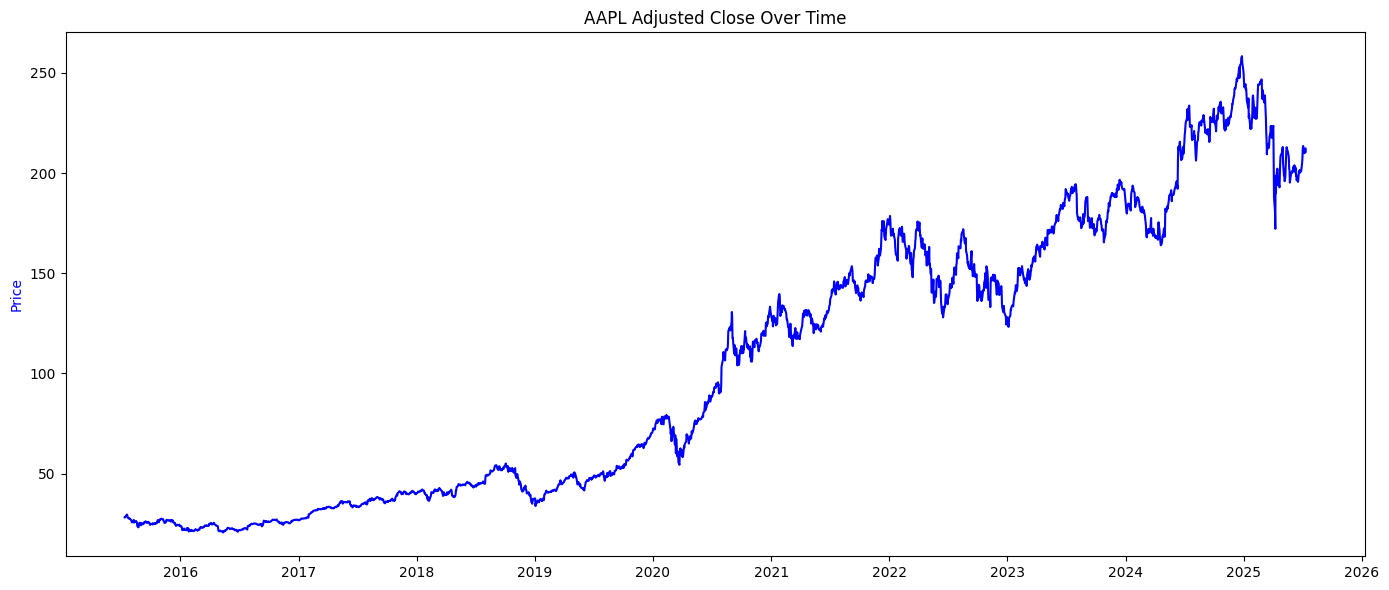

In [74]:
# Visual inspection
plot_price_volume(df)

## Phase 4: Data Cleaning

In this section, we perform systematic cleaning on the raw Apple stock data. The goal is to prepare the dataset for accurate analysis and future signal research.

We will address the following:
1. **Null Values** – Check and handle missing observations (e.g., due to market holidays, partial trading days).
2. **Duplicate Rows** – Ensure no accidental duplication during ingestion.
3. **Outliers** – Visually and programmatically check for extreme values (e.g., price spikes due to data error).
4. **Trading Anomalies** – Detect suspiciously low volume or zero price activity that may indicate bad ticks.

Each cleaning step is modularized into a Python function in `src/data_cleaning.py`, and will be run in sequence on the raw dataset.


In [ ]:
# Returns rows with any missing values
def check_nulls(df):
    return df[df.isnull().any(axis=1)]

In [ ]:
# Returns duplicated rows
def check_duplicates(df):
    return df[df.duplicated()]

In [ ]:
# Drops duplicated rows
def drop_duplicates(df):
    return df.drop_duplicates()

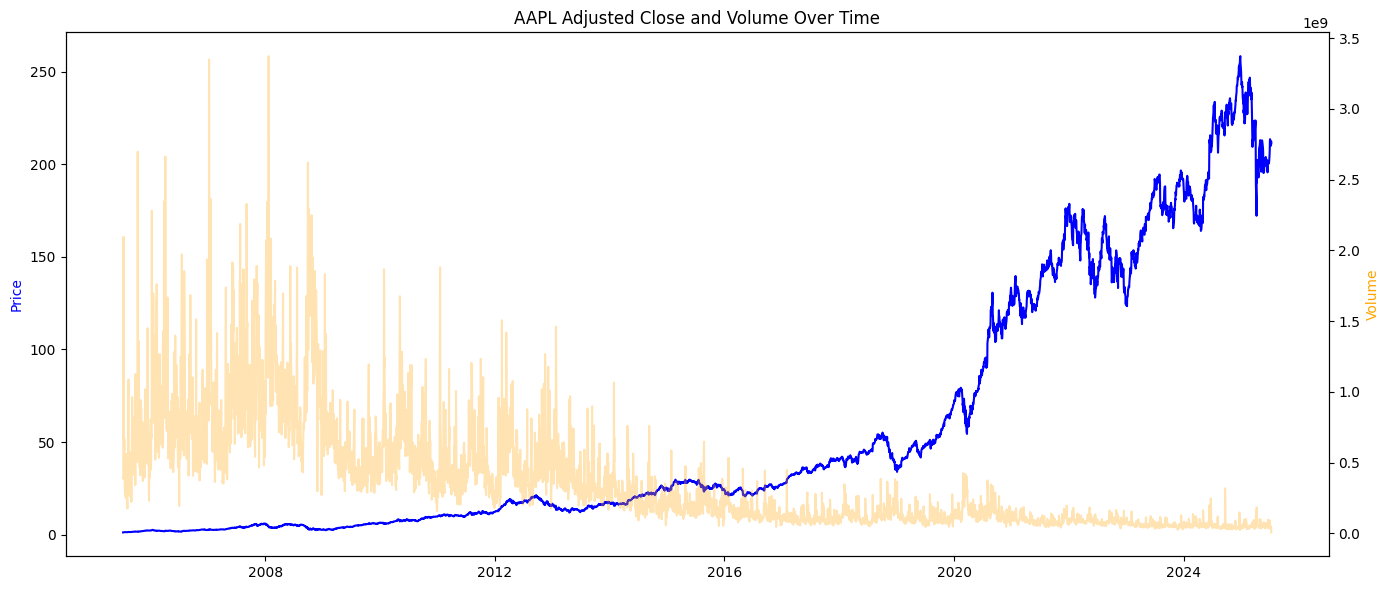

Nulls:
Empty DataFrame
Columns: [(Close, AAPL), (High, AAPL), (Low, AAPL), (Open, AAPL), (Volume, AAPL)]
Index: []
Duplicates:
Empty DataFrame
Columns: [(Close, AAPL), (High, AAPL), (Low, AAPL), (Open, AAPL), (Volume, AAPL)]
Index: []
Suspicious trading days:
Price      Close High  Low Open Volume
Ticker      AAPL AAPL AAPL AAPL   AAPL
Date                                  
2005-07-11   NaN  NaN  NaN  NaN    NaN
2005-07-12   NaN  NaN  NaN  NaN    NaN
2005-07-13   NaN  NaN  NaN  NaN    NaN
2005-07-14   NaN  NaN  NaN  NaN    NaN
2005-07-15   NaN  NaN  NaN  NaN    NaN
...          ...  ...  ...  ...    ...
2025-07-07   NaN  NaN  NaN  NaN    NaN
2025-07-08   NaN  NaN  NaN  NaN    NaN
2025-07-09   NaN  NaN  NaN  NaN    NaN
2025-07-10   NaN  NaN  NaN  NaN    NaN
2025-07-11   NaN  NaN  NaN  NaN    NaN

[5033 rows x 5 columns]


In [5]:


# Run through cleaning steps
print("Nulls:")
print(check_nulls(df_daily))

print("Duplicates:")
print(check_duplicates(df_daily))

print("Suspicious trading days:")
print(flag_suspicious_trading_days(df_daily))

# Clean it
df_daily_clean = clean_stock_data(df_daily)